# Data Science Bookcamp

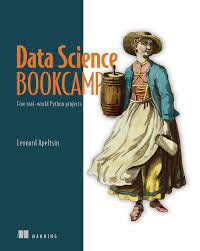

Code for solving case studies from Manning's [Data Science Bookcamp](https://www.manning.com/books/data-science-bookcamp) - book received Nov 11 2021, $39.95 including shipping (from Sep 9 2019 MEAP order).

## Chapter 5 - Basic Probability and Statistical Analysis using SciPy

In [1]:
from scipy import stats

In [2]:
num_heads = 16
num_flips = 20
prob_head = 0.5
prob = stats.binomtest(num_heads, num_flips, prob_head) # binom_test deprecated
print(f"Probability of observing {num_heads} or more heads or tails is {prob.pvalue:.7f}") # returns class

Probability of observing 16 or more heads or tails is 0.0118179


In [3]:
prob_16_heads = stats.binom.pmf(num_heads, num_flips, prob_head)
print(f"The probability of obtaining exactly {num_heads} heads or tails in {num_flips} flips is {prob_16_heads}")

The probability of obtaining exactly 16 heads or tails in 20 flips is 0.004620552062988283


In [4]:
probabilities = stats.binom.pmf([4,16], num_flips, prob_head)
assert probabilities.tolist() == [prob_16_heads] * 2

In [5]:
interval_all_counts = range(21)
probabilities = stats.binom.pmf(interval_all_counts, num_flips, prob_head)
total_prob = probabilities.sum()
print(f"Sum of probabilities = {total_prob:.14f} - it's exact value is {total_prob}, but that is due to representation errors")

Sum of probabilities = 1.00000000000000 - it's exact value is 0.9999999999999998, but that is due to representation errors


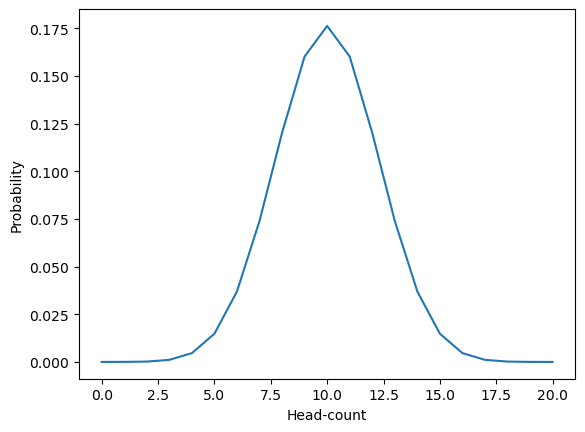

In [6]:
import matplotlib.pyplot as plt
plt.plot(interval_all_counts, probabilities)
plt.xlabel("Head-count")
plt.ylabel("Probability")
plt.show()

When using different numbers of coin flips, this is how the distribution changes:

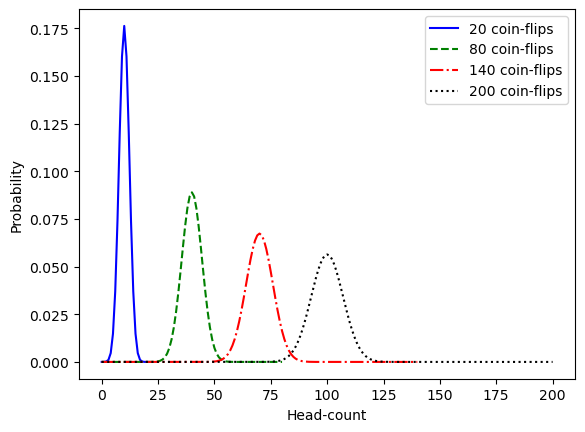

In [7]:
flip_counts = [20, 80, 140, 200]
line_styles = ['-', '--', '-.', ':']
colors = ['b', 'g', 'r', 'k']
for num_flips, linestyle, color in zip(flip_counts,line_styles, colors):
    x_values = range(num_flips+1)
    y_values = stats.binom.pmf(x_values, num_flips, prob_head)
    plt.plot(x_values, y_values, linestyle=linestyle,color=color, label=f"{num_flips} coin-flips")
plt.legend()
plt.xlabel('Head-count')
plt.ylabel('Probability')
plt.show()

## Mean as a measure of centrality

In [8]:
import numpy as np
measurements = np.array([80,77,73,61,74,79,81])

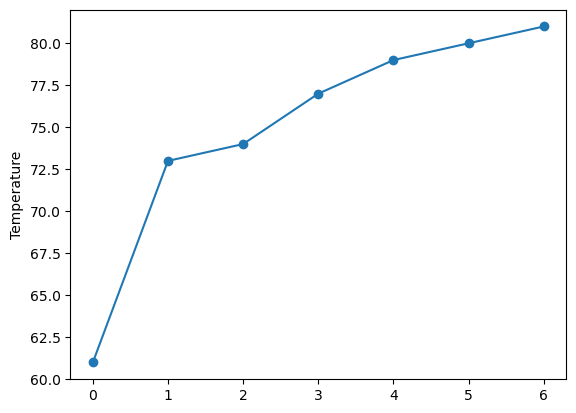

In [9]:
measurements.sort()  # in-place sorting
number_of_days = measurements.size
plt.plot(range(number_of_days), measurements)
plt.scatter(range(number_of_days), measurements)
plt.ylabel("Temperature")
plt.show()

In [10]:
difference = measurements.max() - measurements.min()
midpoint = measurements.min() + difference / 2
assert midpoint == (measurements.max() + measurements.min())/2
print(f"The midpoint is {midpoint} degrees")

The midpoint is 71.0 degrees


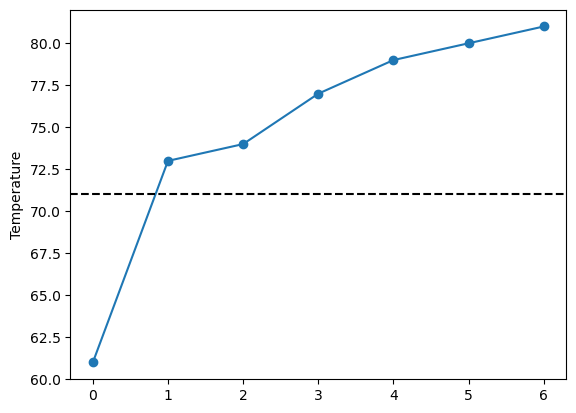

In [11]:
plt.plot(range(number_of_days), measurements)
plt.scatter(range(number_of_days), measurements)
plt.axhline(midpoint,color='k', linestyle='--')
plt.ylabel("Temperature")
plt.show()

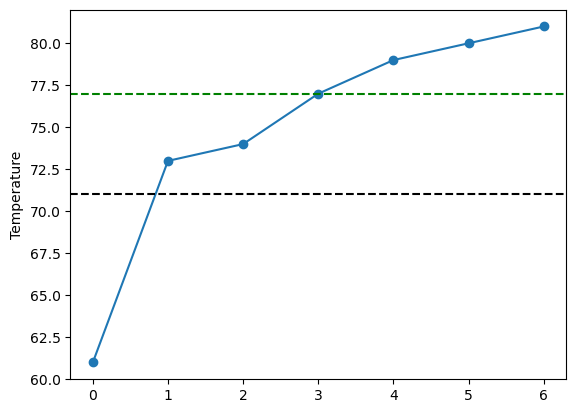

The midpoint is 71.0 degrees
The median temperature is 77 degrees


In [12]:
median = measurements[3]
plt.plot(range(number_of_days), measurements)
plt.scatter(range(number_of_days), measurements)
plt.axhline(midpoint,color='k', linestyle='--',label="midpoint")
plt.axhline(median,color='g', linestyle='--',label="median")
plt.ylabel("Temperature")
plt.show()
print(f"The midpoint is {midpoint} degrees")
print(f"The median temperature is {median} degrees")

The remainder of chapter 5 is not very interesting and the final outcome is to use the mean as a measure for centrality and the variance or standard deviation as a measure for data dispersion.

In [13]:
def squared_distance(value_1, value_2):
    return (value_1 - value_2)**2
    
def weighted_variance(data, weights):
    mean = np.average(data, weights=weights)
    squared_distances = [squared_distance(value, mean) for value in data]
    return np.average(squared_distances, weights=weights)

## Chapter 6 - Making predictions using the central limit theorem and SciPy

Random coin-flips. How many heads come up when we do an experiment of 10,000 coin flips?

In [14]:
np.random.seed(0)
sample_size = 10_000
sample = np.array([np.random.binomial(1,0.5) for _ in range(sample_size)])
head_count = sample.sum()
head_count_frequency = head_count / sample_size
assert head_count_frequency == sample.mean()

Now perform 100,000 experiments of 10,000 coin flips *each*:

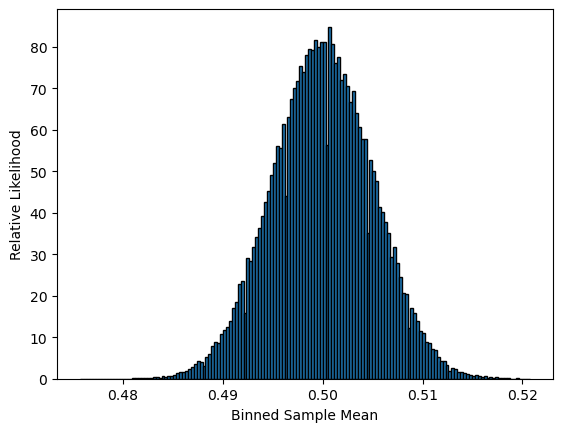

In [15]:
np.random.seed(0)
frequencies = np.random.binomial(sample_size, 0.5, 100_000) / sample_size
sample_means = frequencies
likelihoods, bin_edges, _ = plt.hist(sample_means, bins='auto', edgecolor='black', density=True)
plt.xlabel('Binned Sample Mean')
plt.ylabel('Relative Likelihood')
plt.show()

In [16]:
mean_normal = np.average(bin_edges[:-1],weights=likelihoods)
var_normal = weighted_variance(bin_edges[:-1], likelihoods)
std_normal = var_normal ** 0.5
print(f"Mean is approximately {mean_normal:.2f}")
print(f"Standard deviation is approximately {std_normal:.3f}")

Mean is approximately 0.50
Standard deviation is approximately 0.005


Computing the mean and stddev from the peak's coordinates, assuming a normal data distribution:
$f(x) = \frac{1}{\sigma \sqrt {2 \pi}} e^{-\frac{1}{2}\big(\frac{(x-\mu)}{\sigma}\big)^{2}}$
So, at $x=\mu$:
$f(\mu)= \frac{1}{\sigma \sqrt {2 \pi}}$
Hence:
$\sigma = \frac{1}{f(\mu) \sqrt {2 \pi}}$

In [17]:
import math
peak_x_value = bin_edges[likelihoods.argmax()]   # argmax returns the index for which the value is maximal!
print(f"Mean is approximately {peak_x_value:.2f}")
peak_y_value = likelihoods.max()
std_from_peak = 1/(peak_y_value * (2 * math.pi)**0.5)
print(f"Standard deviation is approximately {std_from_peak:.3f}")

Mean is approximately 0.50
Standard deviation is approximately 0.005


Fitting the normal distribution to the observed data yields similar results:

In [18]:
fitted_mean, fitted_std = stats.norm.fit(sample_means)
print(f"Mean from fitting is approximately {fitted_mean:.2f}")
print(f"Standard deviation from fitting is approximately {fitted_std:.3f}")

Mean from fitting is approximately 0.50
Standard deviation from fitting is approximately 0.005


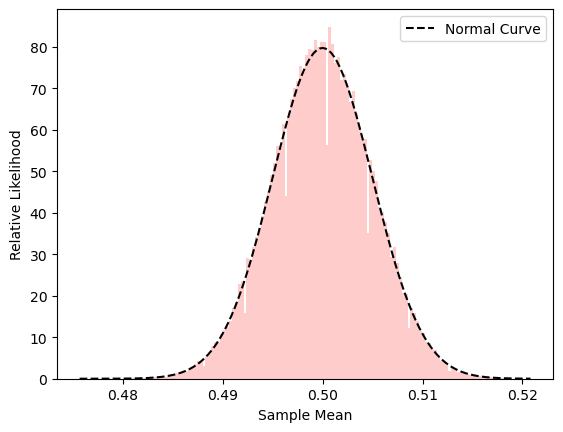

In [19]:
normal_likelihoods = stats.norm.pdf(bin_edges, fitted_mean, fitted_std)
plt.plot(bin_edges, normal_likelihoods, color='k', linestyle="--", label="Normal Curve")
plt.hist(sample_means,bins='auto',alpha=0.2, color='r', density=True)
plt.legend()
plt.xlabel("Sample Mean")
plt.ylabel("Relative Likelihood")
plt.show()

Comparing two sampled normal curves

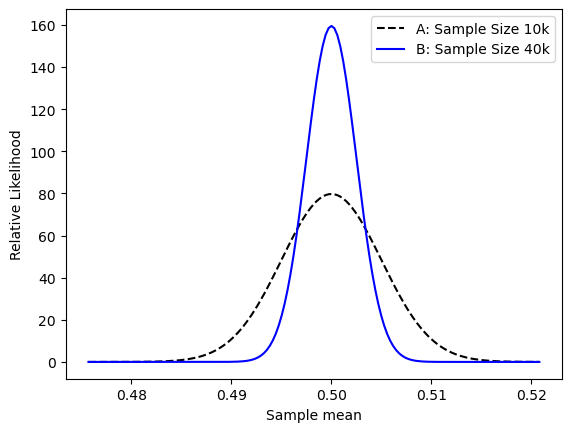

In [20]:
np.random.seed(0)
new_sample_size = 40_000
new_head_counts = np.random.binomial(new_sample_size, 0.5, 100_000)
new_mean, new_std = stats.norm.fit(new_head_counts / new_sample_size)
new_likelihoods = stats.norm.pdf(bin_edges, new_mean, new_std)
plt.plot(bin_edges, normal_likelihoods, color='k', linestyle='--', label="A: Sample Size 10k")
plt.plot(bin_edges, new_likelihoods, color='b', label="B: Sample Size 40k")
plt.legend()
plt.xlabel("Sample mean")
plt.ylabel("Relative Likelihood")
plt.show()


So, what is the 95% confidence interval for this distribution, i.e. between what two values do we find 95% of the area (probability)?

In [21]:
mean, std = new_mean, new_std
start, end = stats.norm.interval(0.95, mean, std)
print(f"The true mean of the sampled binomial distribution is between {start:.3f} and {end:.3f}")

The true mean of the sampled binomial distribution is between 0.495 and 0.505


In [22]:
assert stats.binom.mean(1,0.5) == 0.5

The variance is inversely proportional to the sample size, i.e. increasing the sample size by a factor 4 (10,000 -> 40,000) **decreases** the variance by a factor $\frac{1}{4}$:

In [23]:
variance_ratio = new_std**2 / fitted_std**2
print(f"The ratio of variances is approximately {variance_ratio:.3f}")

The ratio of variances is approximately 0.250


### Determining mean and variance of a population through random sampling
For example, determine average age of a town of 50,000 people.

In [24]:
np.random.seed(0)
population_ages = np.random.randint(1, 85, size=50_000)

In [25]:
population_mean = population_ages.mean()
population_variance = population_ages.var()

Now we take a **sample** of this population:

In [26]:
np.random.seed(0)
sample_size = 10
sample = np.random.choice(population_ages, size=sample_size)
print(f"Sample is {sample}")
sample_mean = sample.mean()

Sample is [ 4 54 47 22 30 13 40 32 16 50]


In [27]:
percent_diff = lambda v1,v2: 100*abs(v1-v2)/v2
percent_diff_means = percent_diff(sample_mean, population_mean)
print(f"There is a {percent_diff_means:.2f}% difference between the means")

There is a 27.59% difference between the means


That is quite a large deviation. What if we increased our sample size to 1000 (performing 100 repeats of 10 observations)?

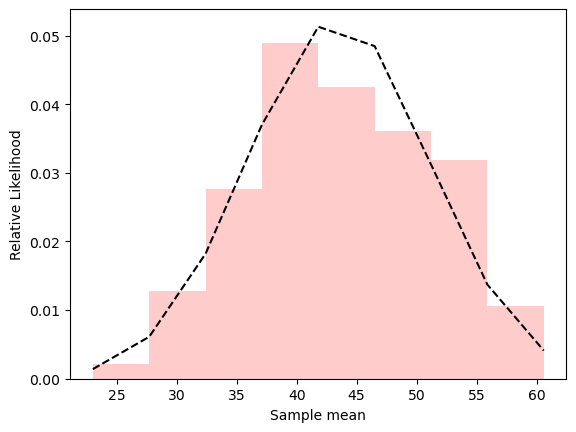

Actual population mean is approximately 42.53
There is a 2.17% difference between the means


In [28]:
np.random.seed(0)
sample_means = [np.random.choice(population_ages, size=sample_size).mean() for _ in range(100)]
likelihoods, bin_edges, _ = plt.hist(sample_means, bins='auto', alpha=0.2, color='r', density=True)
mean, std = stats.norm.fit(sample_means)
normal_likelihoods = stats.norm.pdf(bin_edges, mean, std)
plt.plot(bin_edges, normal_likelihoods, color='k', linestyle='--')
plt.xlabel('Sample mean')
plt.ylabel('Relative Likelihood')
plt.show()
print(f"Actual population mean is approximately {population_mean:.2f}")
percent_diff_means = percent_diff(mean, population_mean)
print(f"There is a {percent_diff_means:.2f}% difference between the means")

In [29]:
normal_variance = std**2
estimated_variance = sample_size * normal_variance

print(f"Estimated variance is {estimated_variance:.2f}, actual variance is {population_variance:.2f}")
percent_diff_var = percent_diff(estimated_variance, population_variance)
print(f"There is a {percent_diff_var:.2f}% difference between the variances")

Estimated variance is 576.73, actual variance is 584.33
There is a 1.30% difference between the variances


So, with only 2% (1,000 out of 50,000) of the subjects we can achieve a decent approximation of the population's mean and variance.

### Making predictions using mean and variance
Let's assume a teacher with a classroom of exactly 20 students, for 25 years. Students take a centrally administered exam, graded from 0-100. What is the chance she has taught a class that aced the exam, i.e. their mean assessment grade was > 89%?

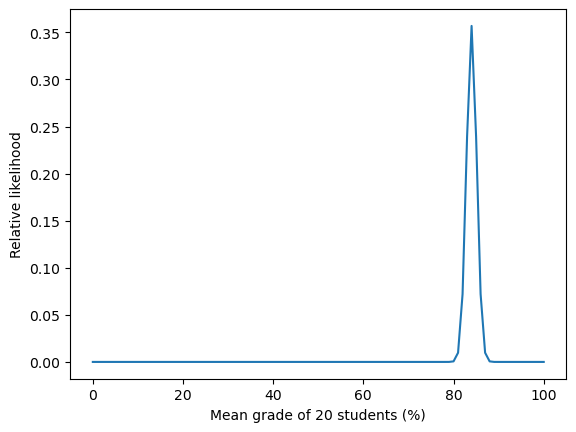

In [30]:
population_mean = 84
population_variance = 25
mean = population_mean
population_std = population_variance ** 0.5
# standard-error-of-the-mean: standard-dev/sqrt(sample_size):
sem = population_std / (20**0.5)
grade_range = range(101)
normal_likelihoods = stats.norm.pdf(grade_range, mean, sem)
plt.plot(grade_range, normal_likelihoods)
plt.xlabel('Mean grade of 20 students (%)')
plt.ylabel("Relative likelihood")
plt.show()

Applying the trapezoidal rule to determine the area under the curve:

In [31]:
total_area = np.sum([normal_likelihoods[i:i+2].sum()/2 for i in range(normal_likelihoods.size - 1)])
assert total_area == np.trapz(normal_likelihoods)
print(f"Estimated area under the curve is {total_area}")

Estimated area under the curve is 1.0000000000384808


An exact answer can be obtained using SciPy's 'survival curve':

In [32]:
assert stats.norm.sf(0, mean, sem) == 1.0  # total area under curve is 1
assert stats.norm.sf(mean, mean, sem) == 0.5  # half the area is right of the mean
print(f"Estimated area beyond the mean is {np.trapz(normal_likelihoods[mean:])}")

Estimated area beyond the mean is 0.5000000000192404


So, to assess the probability of 20 students achieving an average grade > 89:

In [33]:
area = stats.norm.sf(90, mean, sem)
print(f"The probability of 20 students acing the exam is {area}")

The probability of 20 students acing the exam is 4.012555633463782e-08


# Chapter 7 - Statistical Hypothesis Testing

Hypothesis testing is used to choose between two competing hypotheses on uncertain (or incomplete) data. The hypothesis is accepted or rejected based on a measured level of doubt.
Scenario of classroom testing in North Dakota, population mean = 80, population variance = 100.
Assuming that an eightteen student class in South Dakota has outperformed the North Dakota average by 4 percent points, can we assume that the South Dakota curriculum is better than its counterpart in the North?

In [34]:
population_mean = 80
population_variance = 100

mean = population_mean
sem = (population_variance / 18)**0.5

prob_high_grade = stats.norm.sf(84, mean, sem)
prob_low_grade = stats.norm.cdf(76, mean, sem)
print(f"The probability of achieving an average grade >= 84 is {prob_high_grade}")
print(f"The probability of achieving an average grade <= 76 is {prob_low_grade}")

The probability of achieving an average grade >= 84 is 0.044843010885182284
The probability of achieving an average grade <= 76 is 0.044843010885182284


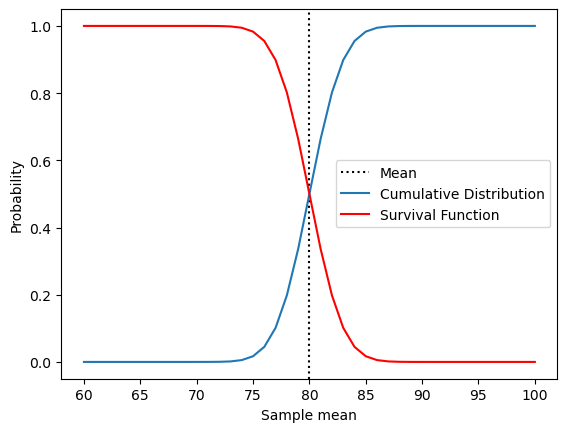

In [35]:
for x in range(-100,100):
    sf_value = stats.norm.sf(mean+x, mean, sem)
    assert sf_value == stats.norm.cdf(mean-x, mean, sem)

plt.axvline(mean, color='k', label='Mean', linestyle=':')
x_values = range(60,101)
plt.plot(x_values, stats.norm.cdf(x_values, mean, sem), label="Cumulative Distribution")
plt.plot(x_values, stats.norm.sf(x_values, mean, sem), label="Survival Function", color='r')
plt.xlabel("Sample mean")
plt.ylabel("Probability")
plt.legend()
plt.show()


In [36]:
p_value = prob_low_grade + prob_high_grade
assert p_value == 2 * prob_high_grade
print(f"The p-value for an extreme grade is {p_value}")

The p-value for an extreme grade is 0.08968602177036457


So there is a 9% chance under the null hypothesis (the North and South Dakotan results are similar) of viewing these extremes. However, if the mean were 85 instead of 84:

In [37]:
def compute_p_value(observed_mean, population_mean, sem):
    mean_diff = abs(population_mean - observed_mean)
    prob_high = stats.norm.sf(population_mean + mean_diff, population_mean, sem)
    return 2 * prob_high

new_p_value = compute_p_value(85,mean,sem)
print(f"The updated p-value is {new_p_value}")

The updated p-value is 0.03389485352468927


In general, statisticians are inclined to reject the null hypothesis if the p-value is below 5% (significance level). However, this 5% is just an _arbitrary_ cutoff. So under the current conditions and significance level, the null hypothesis should be rejected.
As a consequence of the arbitrary nature of the significance threshold of 5%, there are a lot of erroneous rejections of the null hypothesis (so-called type I errors) appearing in scientific journals nowadays, as the 5% significance level is taken as the threshold for publication by a lot of journals. However, this 5% should not be a fixed value, but depends on the actual scenario and the nature of the data (according to Ronald Fisher who established the 5% threshold).
However, if we make the significance level too low, we run the risk of introducing type II errors where we erroneously reject the alternative hypothesis ....
What average value should we accept if we want the significance level to be below 0.001?

In [38]:
for grade in range(80, 100):
    p_value = compute_p_value(grade, population_mean, sem)
    if p_value < 0.001:
        break

print(f"Accepting a significance level of 0.001, an average grade {grade} would be significant with p-value {p_value}")

Accepting a significance level of 0.001, an average grade 88 would be significant with p-value 0.0006885138966450773


### Data dredging: Coming to false conclusions through oversampling

The meaning of the p-value does not represent the probability that the null hypothesis is true; instead, it represents the probability of observing deviations if the null hypothesis is true.

Suppose that the North Dakota results (mean, variance) are equal to the nation-wide results. Thus, the null hypothesis is true for all states in the US.
Let's assume we do not **know** that the null hypothesis is true. We're set on a road-trip in search of a state whose distribution differs from North Dakota's.

In [42]:
# as we know the null hypothesis is true, we can use a normal distribution
np.random.seed(0)
for i in range(1,50):
    print(f"Visiting state {i}")
    random_average_grade = np.random.normal(mean, sem)
    p_value = compute_p_value(random_average_grade, mean, sem)
    if p_value <= 0.05:
        print("We found a statistically significant result")
        print(f"The average grade is {random_average_grade:.2f}")
        print(f"The p-value is {p_value}")
        break
else:
    print("We found no statistically significant results")


Visiting state 1
Visiting state 2
Visiting state 3
Visiting state 4
We found a statistically significant result
The average grade is 85.28
The p-value is 0.025032993883401307


So, the result has a p-value of approximately 2.5%: can we drop the null hypothesis?

Well, the frequency of low p-values will equal the p-value itself. For a p-value of 2.5%, this is to be expected 0.025 * 49 = 1.225 times to occur. This is an example of the cardinal sin of p-hacking or data dredging: repeating experiments until a statistically significant result is found, discarding the remaining failed experiments.

#### Bonferroni correction
To prevent data dredging, we set a fixed number of experiments to run. Next, we set our significance level to the p-value / number of experiments. In this case, our analysis requires 49 states so we set the significance level to 0.05/49:

In [43]:
num_planned_experiments = 49
significance_level = 0.05 / num_planned_experiments
np.random.seed(0)
for i in range(1,50):
    print(f"Visiting state {i}")
    random_average_grade = np.random.normal(mean, sem)
    p_value = compute_p_value(random_average_grade, mean, sem)
    if p_value <= significance_level:
        print("We found a statistically significant result")
        print(f"The average grade is {random_average_grade:.2f}")
        print(f"The p-value is {p_value}")
        break
else:
    print("We found no statistically significant results")


Visiting state 1
Visiting state 2
Visiting state 3
Visiting state 4
Visiting state 5
Visiting state 6
Visiting state 7
Visiting state 8
Visiting state 9
Visiting state 10
Visiting state 11
Visiting state 12
Visiting state 13
Visiting state 14
Visiting state 15
Visiting state 16
Visiting state 17
Visiting state 18
Visiting state 19
Visiting state 20
Visiting state 21
Visiting state 22
Visiting state 23
Visiting state 24
Visiting state 25
Visiting state 26
Visiting state 27
Visiting state 28
Visiting state 29
Visiting state 30
Visiting state 31
Visiting state 32
Visiting state 33
Visiting state 34
Visiting state 35
Visiting state 36
Visiting state 37
Visiting state 38
Visiting state 39
Visiting state 40
Visiting state 41
Visiting state 42
Visiting state 43
Visiting state 44
Visiting state 45
Visiting state 46
Visiting state 47
Visiting state 48
Visiting state 49
We found no statistically significant results
